# Ylearn Synthetic Data - Time Series Data

In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('./introduction.ipynb'))))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from ylearn.exp_dataset.gen import gen, dygen

The data synthetic method follows the Dynotears:

\begin{equation}
    X(t) = X(t) \times B + X(t-1) \times A_1 + \cdots + X(t-p) \times A_p 
\end{equation}

where the intra coefficients matrix $B \in R ^ {d \times d} $ must satisfy a directed acyclic graph constrain, and the inter coefficients matrix $A \in R ^ {d \times d \times p} $ gradually decrease as the order increases.

In [3]:
n, d, step, order = 1, 5, 10, 3  # n is the number of time series, d is the dimension of time series, step is the length of time series, order is the lag order of time series

X, B_mat, A_mat = dygen(n=n, d=d, step=step, order=order) # The synthetic data is stored as a dataframe, and the 3-dimensional tensor with shape (step+order, n, d) is reshaped into a 2-dimensional matrix with shape ((step+order)*n, d)

print(X.shape)

(13, 5)


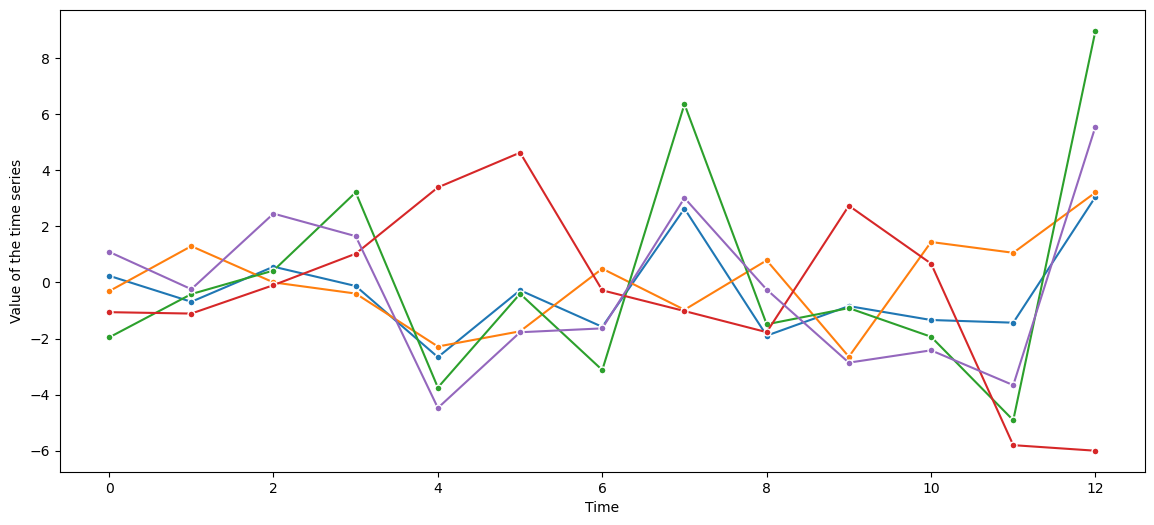

In [4]:
# Take a synthetic time series with n=1, d=5, step=5, order=2 as a expamle, visualize the stationarity of the data.

fig = plt.figure(figsize=(14, 6))
n1 = np.arange(0, step+order, 1)
for i in range(d):
    m1 = X[:, i]
    plt.plot(n1, m1, marker='o', linestyle='-', markersize=5,
             markeredgecolor='white')
    plt.ylabel('Value of the time series')
    plt.xlabel('Time')
plt.show()

In [5]:
# Visualize the intra coefficient matrix B and the inter coefficient matrix A

def plot_dysimulation(B, A):
    if B.shape[0] < 10:
        fig = plt.figure(figsize=(12, 3), dpi=600)
    else:
        fig = plt.figure(figsize=(30, 6), dpi=600)
    gs = GridSpec(1, A.shape[2] + 2, width_ratios=[1] * (A.shape[2] + 1) + [0.05])
    axes = [fig.add_subplot(gs[i]) for i in range(A.shape[2] + 1)]
    sns.heatmap(B, center=0.03, cmap='RdBu_r', vmin=-2.25, vmax=2.25, square=True,
                annot=True, linewidths=0.5, annot_kws={"size": 8},
                xticklabels=False, yticklabels=False, ax=axes[0], cbar=False)
    axes[0].set_title("$\mathit{W}$ (Intra-slice)", fontsize=12)
    for i in range(A.shape[2]):
        ax = axes[i + 1]
        sns.heatmap(A[:, :, i], center=0.03, cmap='RdBu_r', vmin=-2.25, vmax=2.25, square=True,
                    annot=True, linewidths=0.5, annot_kws={"size": 8},
                    xticklabels=False, yticklabels=False, ax=ax, cbar=False)
        ax.set_title("$\mathit{W_%d}$ (Inter-slice)" % (i + 1), fontsize=12)
        # color bar
        if i == A.shape[2] - 1:
            cax = fig.add_subplot(gs[-1])
            sm = plt.cm.ScalarMappable(cmap='RdBu_r', norm=plt.Normalize(vmin=-2.25, vmax=2.25))
            cbar = fig.colorbar(sm, cax=cax, ticks=[-2, 0, 2])
            cbar.ax.set_yticklabels(['-2', '0', '2'])
            cbar.outline.set_visible(False)
    plt.show()


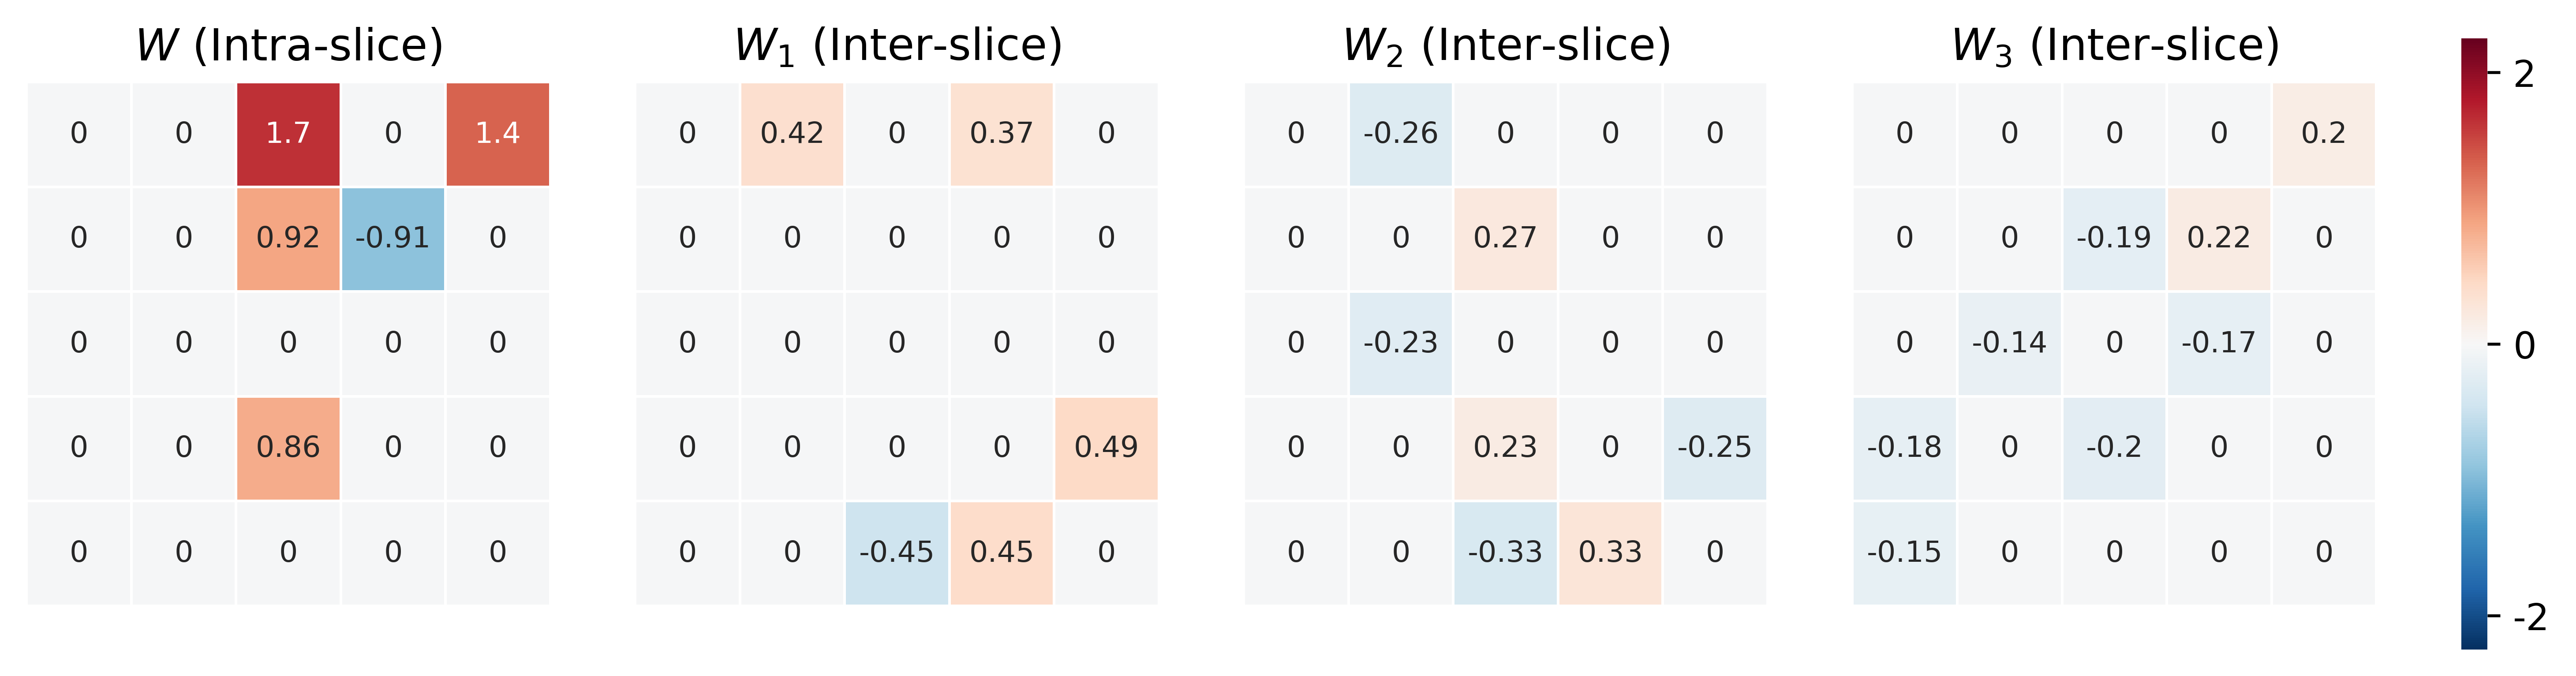

In [6]:
plot_dysimulation(B_mat, A_mat)